In [22]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
file = '/home/expertsvision/Desktop/DataForMLLive.xlsx'
data = pd.ExcelFile(file)
limit_df = data.parse('Order History')
df = limit_df.head(5000)

In [23]:
timstamp_into_int = df[['Created Time', 'Biker Assigned Time', 'Biker Accepted Time', 'In Bike TIme']].values.astype(int)
location_code = df['Location Code'].values
X = np.insert(timstamp_into_int, 1, location_code, axis=1)
Y = df['Delivered Time'].values.astype(int)
xtrain, xtst, ytrain, ytst = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
clf = GaussianNB()
trained_model = clf.fit(xtrain, ytrain)

In [5]:
y_predict = trained_model.predict(xtst)

In [6]:
r2_score(ytst, y_predict, sample_weight=None, multioutput='uniform_average')

1.0

In [7]:
ms = np.mean(np.square(np.subtract(ytst, y_predict)))
rms = np.sqrt(np.sum(np.subtract(ytst, y_predict)**2)/len(ytst))
ms

3.594233500014985e+17

In [8]:
rms

27141475.261458002

In [21]:
comparison = pd.DataFrame({'test_data': pd.Series(ytst).astype('datetime64[ns]'), 'predicted_data': pd.Series(y_predict).astype('datetime64[ns]')})

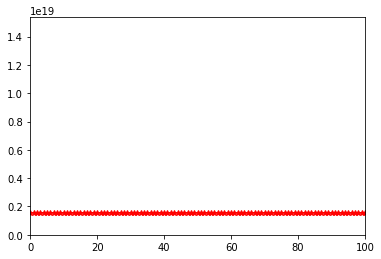

In [12]:
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,1.536e19])
plt.plot(y_predict, '*', color= 'r',  label= 'predicted values') # p
plt.show()

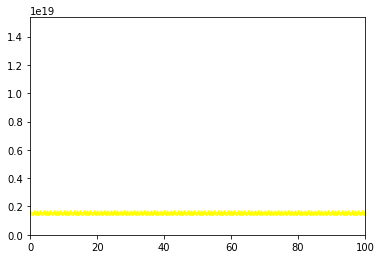

In [13]:
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,1.536e19])
plt.plot(ytst, '*', color= 'yellow', label= 'actual values') # p
plt.show()

In [24]:
timstamp_into_int.shape

(30000, 4)

In [25]:
location_code.shape

(30000,)